# Purpose of notebook
This notebook is to continue to explore the data, in particular the time-series and bi-modal distributions from previous version. 

Topics covered:
- swiftplay gametype


In [1]:
import json
import pandas as pd

## Loading the data

In [2]:
# Load JSON data from file
with open('dev_data.json', 'r') as f:
    data = json.load(f)

# Access an element to retrieve the keys
sample_element = data[0]
columns = sample_element.keys()
print("Columns:", columns)

num_rows = len(data)
print("Number of rows:", num_rows)

Columns: dict_keys(['id', 'game_id', 'map_id', 'processed', 'process_date', 'created_at', 'updated_at', 'match_id', 'result', 'score', 'statistics', 'totals', 'ten_minute_averages', 'character_id', 'user_id', 'match_length', 'video_id', 'card_url', 'total_time', 'totals_to_date', 'start_time', 'end_time', 'start_frame', 'end_frame', 'status', 'report', 'analysis_processed', 'analysis_status'])
Number of rows: 534


In [3]:
# Observing a random entry
data[4]

{'id': 4612,
 'game_id': 3,
 'map_id': 32,
 'processed': True,
 'process_date': None,
 'created_at': '2023-05-05T09:17:04.490Z',
 'updated_at': '2023-05-05T18:51:37.392Z',
 'match_id': None,
 'result': 'win',
 'score': '13-10',
 'statistics': {'map': 'Haven',
  'score': '13-10',
  'allies': ['0', '1', '2', '3', '4'],
  'player': '2',
  'result': 'win',
  'rounds': {'0': {'alive': {'0': [[73399, True], [153799, False]],
     '1': [[73399, True], [182799, False], [189799, True], [243799, False]],
     '2': [[73399, True], [157199, False]],
     '3': [[73399, True], [169199, False]],
     '4': [[73399, True], [139799, False]],
     '5': [[73399, True], [151799, False]],
     '6': [[73399, True], [153799, False]],
     '7': [[73399, True], [182799, False], [189799, True]],
     '8': [[73399, True], [183199, False], [185999, True]],
     '9': [[73399, True], [149399, False]]},
    'elims': [[139999,
      {'source': '8',
       'target': '4',
       'assisted': [],
       'headshot': True,


In [4]:
# Observing specifically the stats col
data[4]['statistics']

{'map': 'Haven',
 'score': '13-10',
 'allies': ['0', '1', '2', '3', '4'],
 'player': '2',
 'result': 'win',
 'rounds': {'0': {'alive': {'0': [[73399, True], [153799, False]],
    '1': [[73399, True], [182799, False], [189799, True], [243799, False]],
    '2': [[73399, True], [157199, False]],
    '3': [[73399, True], [169199, False]],
    '4': [[73399, True], [139799, False]],
    '5': [[73399, True], [151799, False]],
    '6': [[73399, True], [153799, False]],
    '7': [[73399, True], [182799, False], [189799, True]],
    '8': [[73399, True], [183199, False], [185999, True]],
    '9': [[73399, True], [149399, False]]},
   'elims': [[139999,
     {'source': '8',
      'target': '4',
      'assisted': [],
      'headshot': True,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': True,
      'team_credit': 'opponent'}],
    [149599,
     {'source': '1',
      'target': '9',
      'assisted': [],
      'headshot': True,
      'wallbang': False,
      'elim_number': 1,
 

## Observations about the data
- only gametype other than blank is swiftplay
- blank could be any gametype

In [5]:
# find gametypes 
gametypes = set()

for item in data:
    if 'statistics' in item and 'gametype' in item['statistics']:
        gametypes.add(item['statistics']['gametype'])

print(gametypes)

{'swiftplay'}


## Swiftplay counts / plotting
- data is imbalanced
- tons more Swiftplay matches than expected
- hypothesis is this is that cause of the "bi-modal" data issue
- due to the nature of the game, swiftplay is the same but with less rounds, so lets try breaking up the data by round
- however b/c the blank category could be anything, swiftplay matches are mixed in

In [8]:
# Check the number of rows where the gametype is a swiftplay
swiftplay_count = 0

for item in data:
    if 'statistics' in item and 'gametype' in item['statistics']:
        if item['statistics']['gametype'] == 'swiftplay':
            swiftplay_count += 1

print(swiftplay_count)

264


In [9]:
swiftplay_games = []

# Iterate over the data
for item in data:
    if 'statistics' in item and 'gametype' in item['statistics']:
        if item['statistics']['gametype'] == 'swiftplay':
            swiftplay_games.append(item)

# Create a DataFrame with swiftplay games
swiftplay_df = pd.DataFrame(swiftplay_games)

# Create a DataFrame without swiftplay games
non_swiftplay_df = pd.DataFrame([item for item in data if 'statistics' not in item or 'gametype' not in item['statistics'] or item['statistics']['gametype'] != 'swiftplay'])



In [10]:
swiftplay_df

,id,game_id,map_id,processed,process_date,created_at,updated_at,match_id,result,score,...,total_time,totals_to_date,start_time,end_time,start_frame,end_frame,status,report,analysis_processed,analysis_status
0,4633,3,136,True,None,2023-05-05T10:04:15.097Z,2023-05-05T19:06:07.143Z,None,win,13-3,...,11354000,"{'elims': 140, 'deaths': 77, 'assists': 14, 'h...",0,895000,0,53700,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...
1,4631,3,32,True,None,2023-05-05T10:01:25.781Z,2023-05-05T19:04:31.749Z,None,loss,9-13,...,10459000,"{'elims': 131, 'deaths': 74, 'assists': 12, 'h...",2135000,4206000,128100,252360,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...
2,4630,3,33,True,None,2023-05-05T09:59:24.229Z,2023-05-05T18:56:29.545Z,None,win,13-4,...,8388000,"{'elims': 110, 'deaths': 57, 'assists': 12, 'h...",464000,1983000,27840,118980,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...
3,4613,3,28,True,None,2023-05-05T09:19:39.378Z,2023-05-05T18:58:46.737Z,None,win,14-12,...,69339064,"{'elims': 404, 'deaths': 396, 'assists': 121, ...",16735999,19415999,1004160,1164960,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...
4,4612,3,32,True,None,2023-05-05T09:17:04.490Z,2023-05-05T18:51:37.392Z,None,win,13-10,...,66659064,"{'elims': 390, 'deaths': 384, 'assists': 109, ...",14434999,16671999,866100,1000320,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,3957,3,28,True,None,2023-04-27T16:59:47.382Z,2023-04-27T22:35:56.081Z,None,win,13-8,...,7057068,"{'elims': 48, 'deaths': 56, 'assists': 18, 'he...",1839066,3320119,110340,199200,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...
260,3955,3,28,True,None,2023-04-27T16:56:20.730Z,2023-04-27T22:21:11.624Z,None,win,3-1,...,5576015,"{'elims': 40, 'deaths': 47, 'assists': 14, 'he...",1353048,1799064,81180,107940,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...
261,3951,3,28,True,None,2023-04-27T16:51:05.415Z,2023-04-27T21:58:46.871Z,None,win,13-6,...,12756184,"{'elims': 123, 'deaths': 81, 'assists': 33, 'h...",5067170,6878231,304020,412680,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...
262,3949,3,134,True,None,2023-04-27T16:48:10.651Z,2023-04-27T21:35:04.658Z,None,win,13-4,...,10945123,"{'elims': 108, 'deaths': 72, 'assists': 29, 'h...",3059103,4717158,183540,283020,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...


In [11]:
non_swiftplay_df

,id,game_id,map_id,processed,process_date,created_at,updated_at,match_id,result,score,...,total_time,totals_to_date,start_time,end_time,start_frame,end_frame,status,report,analysis_processed,analysis_status
0,2884,3,136,True,None,2023-03-29T14:14:16.440Z,2023-03-29T22:23:43.021Z,None,loss,7-13,...,6644000,"{'elims': 50, 'deaths': 52, 'assists': 13, 'he...",7985000,9775000,479100,586500,success: completed - valorant postprocess | ac...,{},True,completed: processing - anyalysis (insights) |...
1,2883,3,30,True,None,2023-03-29T14:08:52.218Z,2023-03-29T22:23:42.994Z,None,loss,8-13,...,4854000,"{'elims': 34, 'deaths': 38, 'assists': 9, 'hea...",5188000,6894000,311280,413640,success: completed - valorant postprocess | ac...,{},True,completed: processing - anyalysis (insights) |...
2,2881,3,136,True,None,2023-03-29T14:04:16.649Z,2023-03-29T22:23:28.627Z,None,draw,15-15,...,3148000,"{'elims': 19, 'deaths': 17, 'assists': 5, 'hea...",1131000,4279000,67860,256740,success: completed - valorant postprocess | ac...,{},True,completed: processing - anyalysis (insights) |...
3,2873,3,30,True,None,2023-03-28T23:09:38.279Z,2023-04-03T16:46:56.037Z,None,win,13-4,...,30261010,"{'elims': 186, 'deaths': 160, 'assists': 47, '...",11949000,13334000,716940,800040,success: completed - valorant postprocess | ac...,{},True,completed: processing - anyalysis (insights) |...
4,2872,3,34,True,None,2023-03-28T23:06:48.357Z,2023-04-03T16:46:56.007Z,None,win,13-5,...,28876010,"{'elims': 171, 'deaths': 155, 'assists': 45, '...",10132000,11760000,607920,705600,success: completed - valorant postprocess | ac...,{},True,completed: processing - anyalysis (insights) |...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1466,3,34,True,None,2023-02-27T21:24:45.202Z,2023-02-27T21:33:58.499Z,None,win,13-8,...,2037000,"{'elims': 12, 'deaths': 11, 'assists': 9, 'hea...",0,2037000,0,61110,success: completed - valorant postprocess,{},True,completed: processing - anyalysis (insights)
266,1464,3,31,True,None,2023-02-27T21:21:35.997Z,2023-02-27T21:28:42.713Z,None,win,14-12,...,4882999,"{'elims': 47, 'deaths': 35, 'assists': 14, 'he...",0,2506999,0,75210,success: completed - valorant postprocess,{},True,completed: processing - anyalysis (insights)
267,1463,3,134,True,None,2023-02-27T21:19:04.449Z,2023-02-27T21:23:57.355Z,None,win,13-11,...,2376000,"{'elims': 23, 'deaths': 16, 'assists': 6, 'hea...",4000,2380000,120,71400,success: completed - valorant postprocess,{},True,completed: processing - anyalysis (insights)
268,1462,3,33,True,None,2023-02-27T21:07:02.155Z,2023-03-01T16:36:13.701Z,None,win,13-4,...,3309552,"{'elims': 28, 'deaths': 34, 'assists': 24, 'he...",8296875,9929654,248940,297930,success: completed - valorant postprocess,{},True,completed: processing - anyalysis (insights)


In [17]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

# Create a new column 'swiftplay'
df['swiftplay'] = df.apply(lambda row: 1 if 'statistics' in row and 'gametype' in row['statistics'] and row['statistics']['gametype'] == 'swiftplay' else 0, axis=1)

In [18]:
df

,id,game_id,map_id,processed,process_date,created_at,updated_at,match_id,result,score,...,totals_to_date,start_time,end_time,start_frame,end_frame,status,report,analysis_processed,analysis_status,swiftplay
0,4633,3,136,True,None,2023-05-05T10:04:15.097Z,2023-05-05T19:06:07.143Z,None,win,13-3,...,"{'elims': 140, 'deaths': 77, 'assists': 14, 'h...",0,895000,0,53700,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...,1
1,4631,3,32,True,None,2023-05-05T10:01:25.781Z,2023-05-05T19:04:31.749Z,None,loss,9-13,...,"{'elims': 131, 'deaths': 74, 'assists': 12, 'h...",2135000,4206000,128100,252360,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...,1
2,4630,3,33,True,None,2023-05-05T09:59:24.229Z,2023-05-05T18:56:29.545Z,None,win,13-4,...,"{'elims': 110, 'deaths': 57, 'assists': 12, 'h...",464000,1983000,27840,118980,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...,1
3,4613,3,28,True,None,2023-05-05T09:19:39.378Z,2023-05-05T18:58:46.737Z,None,win,14-12,...,"{'elims': 404, 'deaths': 396, 'assists': 121, ...",16735999,19415999,1004160,1164960,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...,1
4,4612,3,32,True,None,2023-05-05T09:17:04.490Z,2023-05-05T18:51:37.392Z,None,win,13-10,...,"{'elims': 390, 'deaths': 384, 'assists': 109, ...",14434999,16671999,866100,1000320,success: completed - valorant final | complete...,{},True,completed: processing - anyalysis (insights) |...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1466,3,34,True,None,2023-02-27T21:24:45.202Z,2023-02-27T21:33:58.499Z,None,win,13-8,...,"{'elims': 12, 'deaths': 11, 'assists': 9, 'hea...",0,2037000,0,61110,success: completed - valorant postprocess,{},True,completed: processing - anyalysis (insights),0
530,1464,3,31,True,None,2023-02-27T21:21:35.997Z,2023-02-27T21:28:42.713Z,None,win,14-12,...,"{'elims': 47, 'deaths': 35, 'assists': 14, 'he...",0,2506999,0,75210,success: completed - valorant postprocess,{},True,completed: processing - anyalysis (insights),0
531,1463,3,134,True,None,2023-02-27T21:19:04.449Z,2023-02-27T21:23:57.355Z,None,win,13-11,...,"{'elims': 23, 'deaths': 16, 'assists': 6, 'hea...",4000,2380000,120,71400,success: completed - valorant postprocess,{},True,completed: processing - anyalysis (insights),0
532,1462,3,33,True,None,2023-02-27T21:07:02.155Z,2023-03-01T16:36:13.701Z,None,win,13-4,...,"{'elims': 28, 'deaths': 34, 'assists': 24, 'he...",8296875,9929654,248940,297930,success: completed - valorant postprocess,{},True,completed: processing - anyalysis (insights),0


In [19]:
# drop the processing cols
df = df.drop(['processed', 'game_id','process_date', 'updated_at','total_time','match_id','end_frame','start_frame','status','report','analysis_processed','analysis_status','video_id','card_url'], axis=1)

# expanding the totals/summary stats into its own columns
df_expanded = pd.json_normalize(df['totals'])

# Assign the expanded columns back to the original DataFrame
df = pd.concat([df, df_expanded], axis=1)

# Drop the 'totals' column
df = df.drop('totals', axis=1)

# dropping these for now?
df = df.drop(['ten_minute_averages','statistics','totals_to_date'], axis=1)

In [24]:
df

,id,map_id,created_at,result,score,character_id,user_id,match_length,start_time,end_time,...,wallbangs,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken
0,4633,136,2023-05-05T10:04:15.097Z,win,13-3,42,1006,895000,0,895000,...,0.0,2.0,162.0,3.0,29060.0,1.0,677.0,33110.0,446.0,170.0
1,4631,32,2023-05-05T10:01:25.781Z,loss,9-13,1411,1006,2071000,2135000,4206000,...,3.0,2.0,367.0,1.0,33400.0,1.0,1571.0,39350.0,1688.0,634.0
2,4630,33,2023-05-05T09:59:24.229Z,win,13-4,42,1006,1519000,464000,1983000,...,0.0,6.0,248.0,9.0,25450.0,1.0,1233.0,38700.0,1165.0,445.0
3,4613,28,2023-05-05T09:19:39.378Z,win,14-12,45,1011,2680000,16735999,19415999,...,0.0,3.0,463.0,4.0,44500.0,0.0,2057.0,44750.0,2032.0,1009.0
4,4612,32,2023-05-05T09:17:04.490Z,win,13-10,52,1011,2237000,14434999,16671999,...,0.0,1.0,609.0,6.0,38700.0,6.0,1456.0,41100.0,1914.0,817.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1466,34,2023-02-27T21:24:45.202Z,win,13-8,48,1010,2037000,0,2037000,...,1.0,5.0,443.0,7.0,34015.0,1.0,1578.0,37515.0,1676.0,1050.0
530,1464,31,2023-02-27T21:21:35.997Z,win,14-12,35,1011,2506999,0,2506999,...,1.0,2.0,431.0,8.0,56550.0,2.0,2049.0,57350.0,2223.0,915.0
531,1463,134,2023-02-27T21:19:04.449Z,win,13-11,35,1011,2376000,4000,2380000,...,2.0,1.0,566.0,6.0,71534.0,2.0,1783.0,72884.0,1632.0,2732.0
532,1462,33,2023-02-27T21:07:02.155Z,win,13-4,34,1018,1632779,8296875,9929654,...,0.0,3.0,373.0,1.0,36530.0,1.0,1231.0,39680.0,1396.0,1007.0


In [23]:
df.columns

Index(['id', 'map_id', 'created_at', 'result', 'score', 'character_id',
       'user_id', 'match_length', 'start_time', 'end_time', 'swiftplay',
       'elims', 'deaths', 'assists', 'healing', 'headshots', 'shielding',
       'wallbangs', 'first_bloods', 'seconds_dead', 'was_assisted',
       'credits_spent', 'first_blooded', 'seconds_alive', 'credits_earned',
       'hp_damage_taken', 'shield_damage_taken'],
      dtype='object')

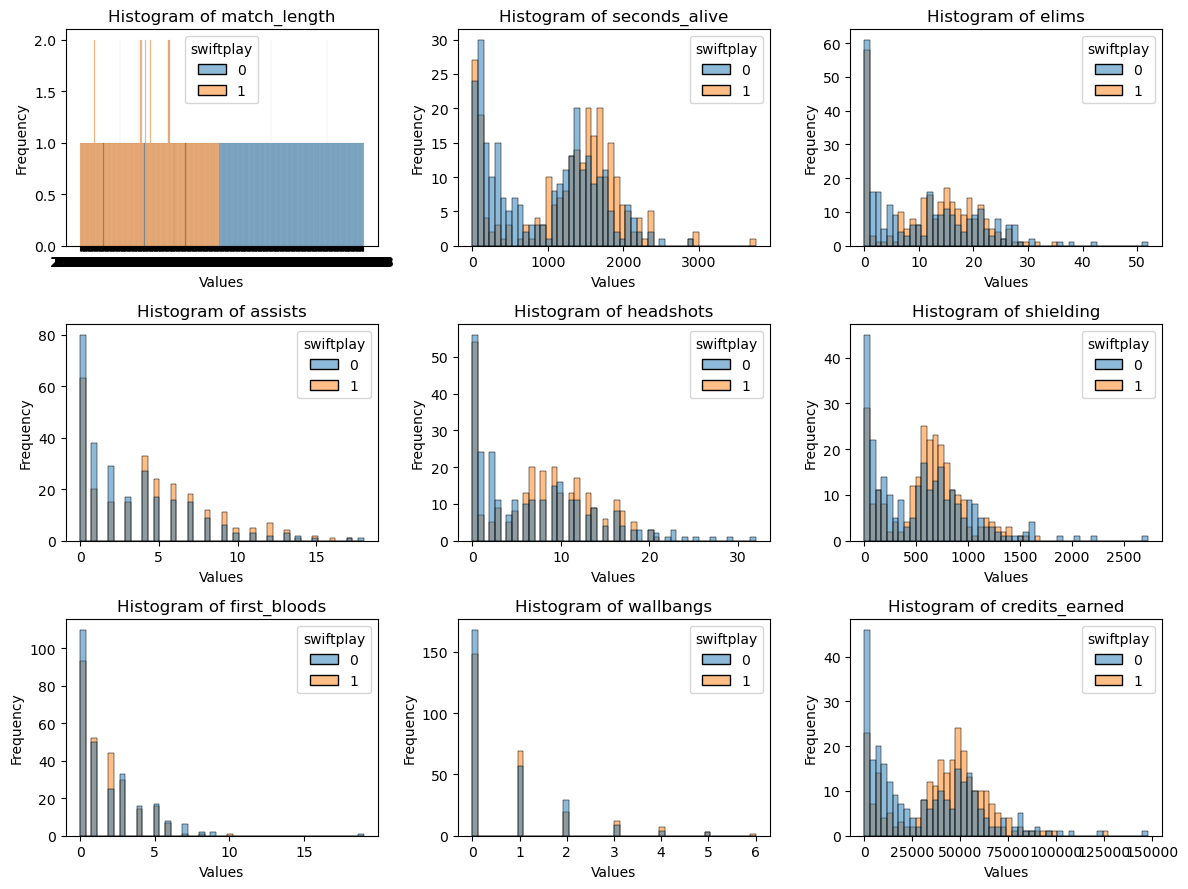

In [26]:
import seaborn as sns

# Specify the class label column
class_label = 'swiftplay'
columns = ['match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=df, x=column, hue=class_label, ax=ax, bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

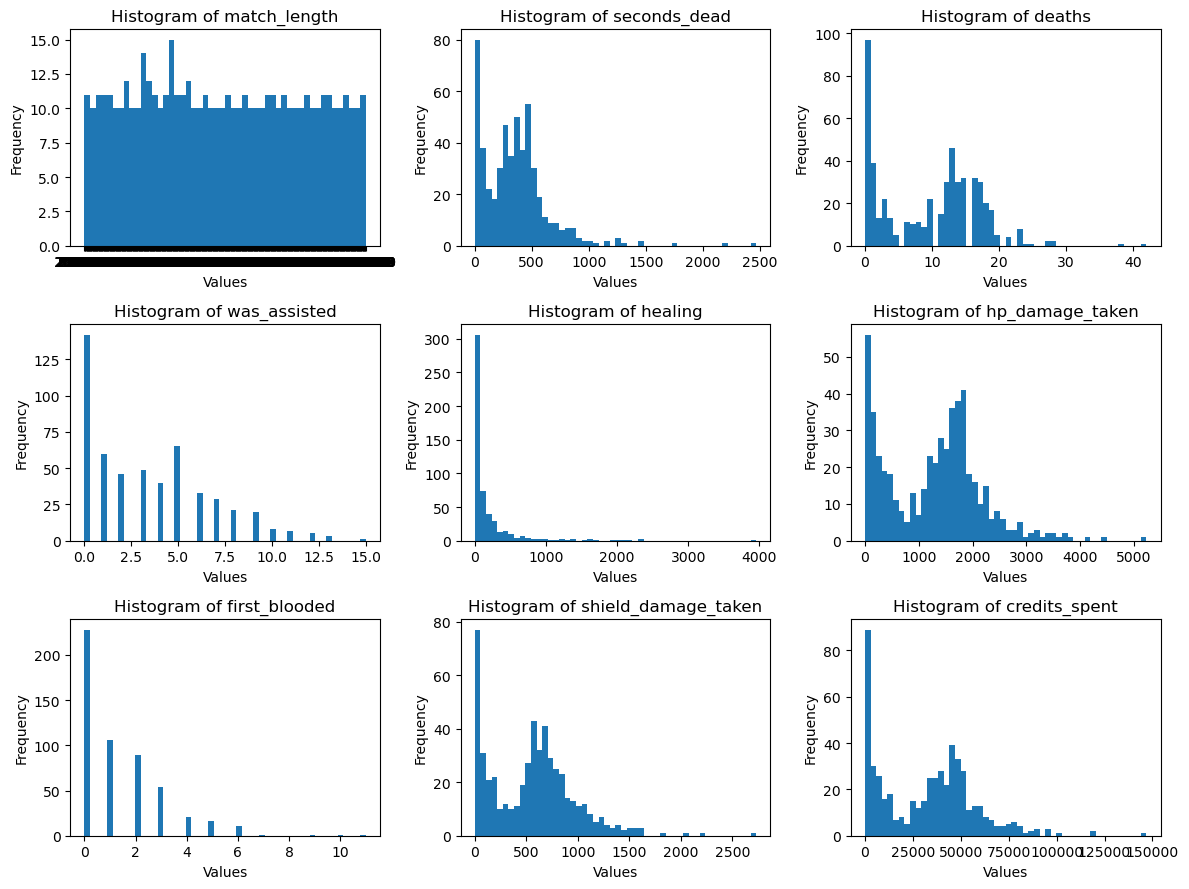

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df[column], bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()
